In [1]:
import os
import json

In [2]:
BASE_DIR = "../input/cassava-leaf-disease-classification/"
with open(os.path.join(BASE_DIR, "label_num_to_disease_map.json")) as file:
    map_classes = json.loads(file.read())
    
print(json.dumps(map_classes, indent=4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


In [3]:
input_files = os.listdir(os.path.join(BASE_DIR, "train_images"))
print(f"Number of train images: {len(input_files)}")

Number of train images: 21397


In [4]:
import cv2
img_shapes = {}
for image_name in os.listdir(os.path.join(BASE_DIR, "train_images"))[:300]:
    image = cv2.imread(os.path.join(BASE_DIR, "train_images", image_name))
    img_shapes[image.shape] = img_shapes.get(image.shape, 0) + 1

print(img_shapes)

{(600, 800, 3): 300}


In [5]:
import pandas as pd

df_train = pd.read_csv(os.path.join(BASE_DIR, "train.csv"))

df_train["class_name"] = df_train["label"].astype(str).map(map_classes)

df_train

image_id  label                           class_name
0      1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1      1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2       100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3      1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4      1000812911.jpg      3         Cassava Mosaic Disease (CMD)
...               ...    ...                                  ...
21392   999068805.jpg      3         Cassava Mosaic Disease (CMD)
21393   999329392.jpg      3         Cassava Mosaic Disease (CMD)
21394   999474432.jpg      1  Cassava Brown Streak Disease (CBSD)
21395   999616605.jpg      4                              Healthy
21396   999998473.jpg      4                              Healthy

[21397 rows x 3 columns]

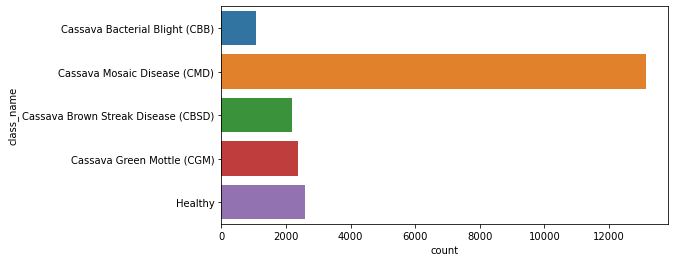

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(8, 4))
sn.countplot(y="class_name", data=df_train);

In [7]:
def visualize_batch(image_ids, labels):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, labels)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Class: {label}", fontsize=12)
        plt.axis("off")
    
    plt.show()

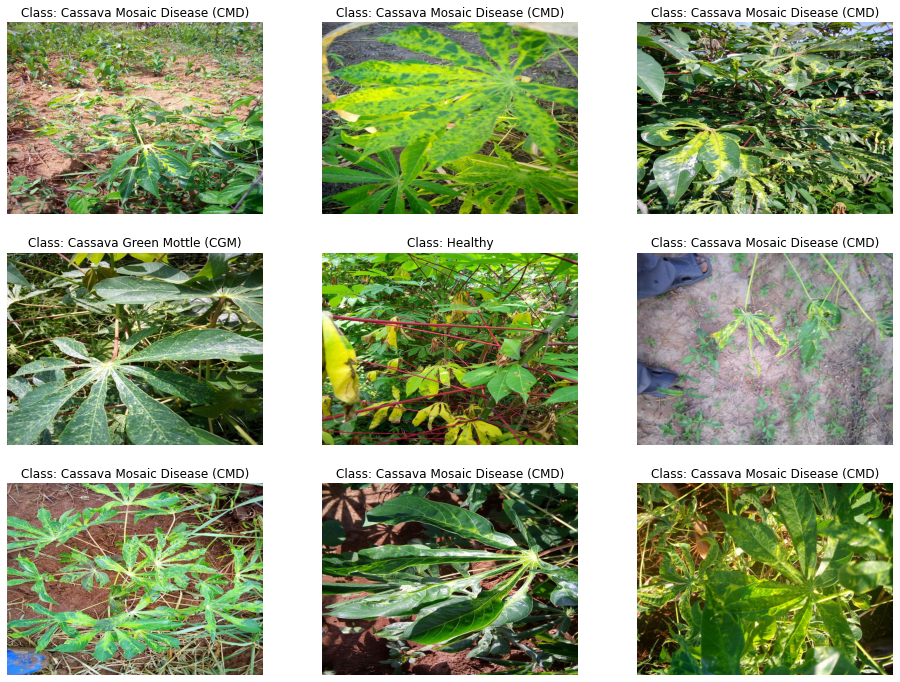

In [8]:
tmp_df = df_train.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["class_name"].values

visualize_batch(image_ids, labels)

Total train images for class 0: 1087


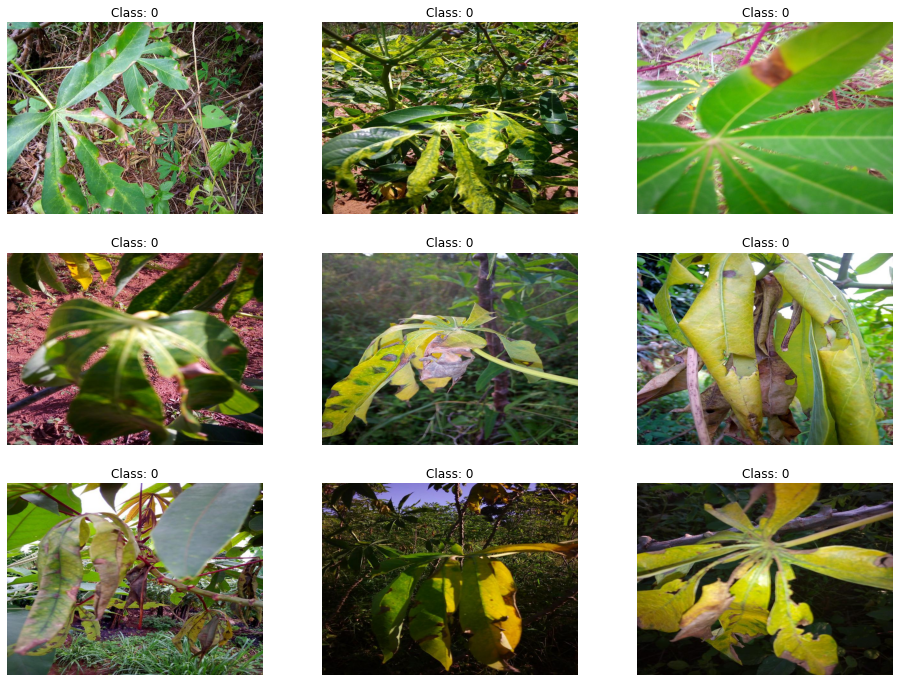

In [9]:
tmp_df = df_train[df_train["label"] == 0]
print(f"Total train images for class 0: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

Total train images for class 1: 2189


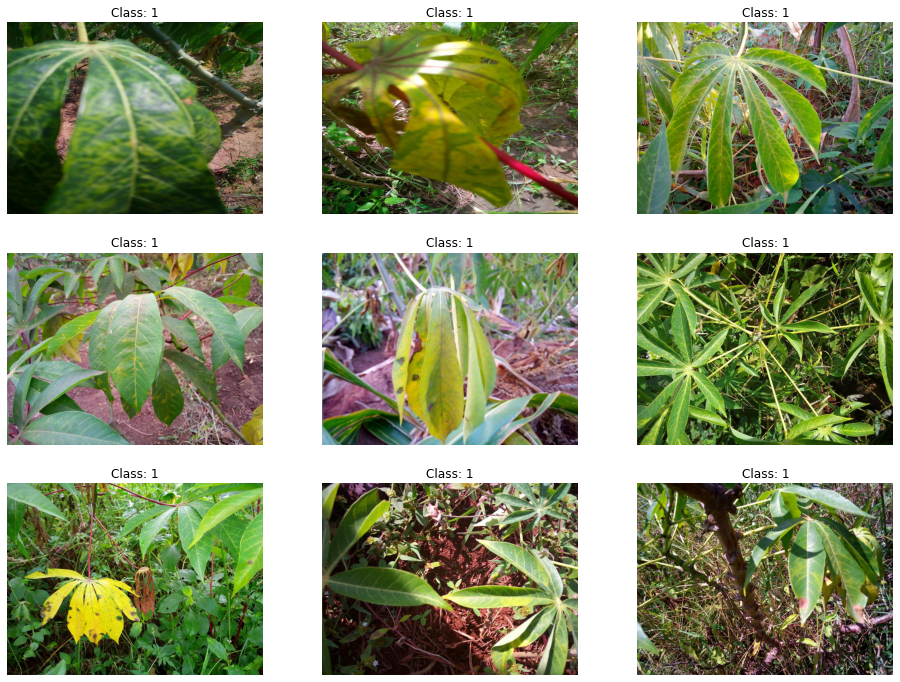

In [10]:
tmp_df = df_train[df_train["label"] == 1]
print(f"Total train images for class 1: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

Total train images for class 2: 2386


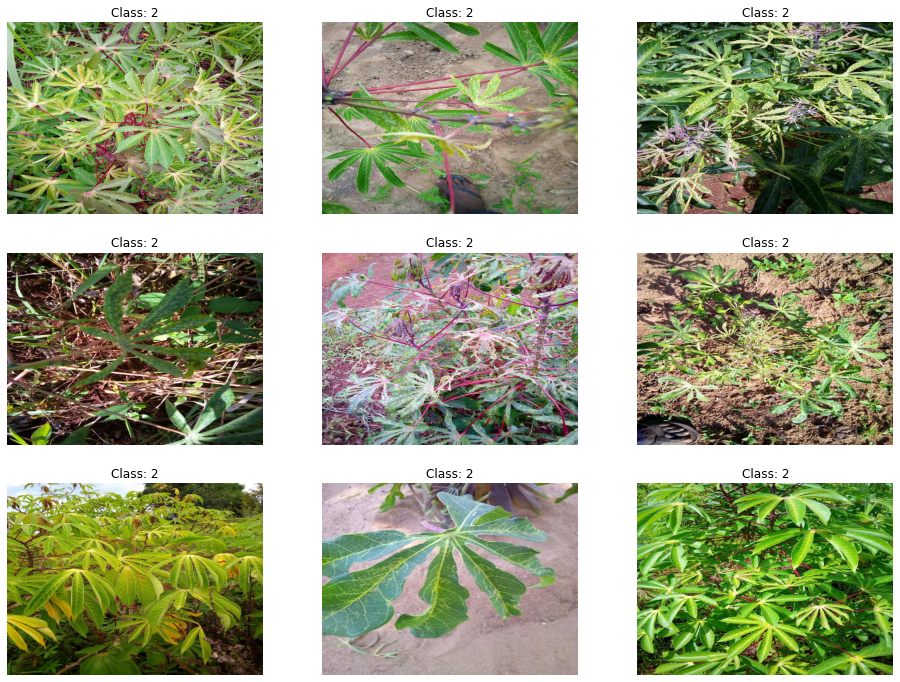

In [11]:
tmp_df = df_train[df_train["label"] == 2]
print(f"Total train images for class 2: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

Total train images for class 3: 13158


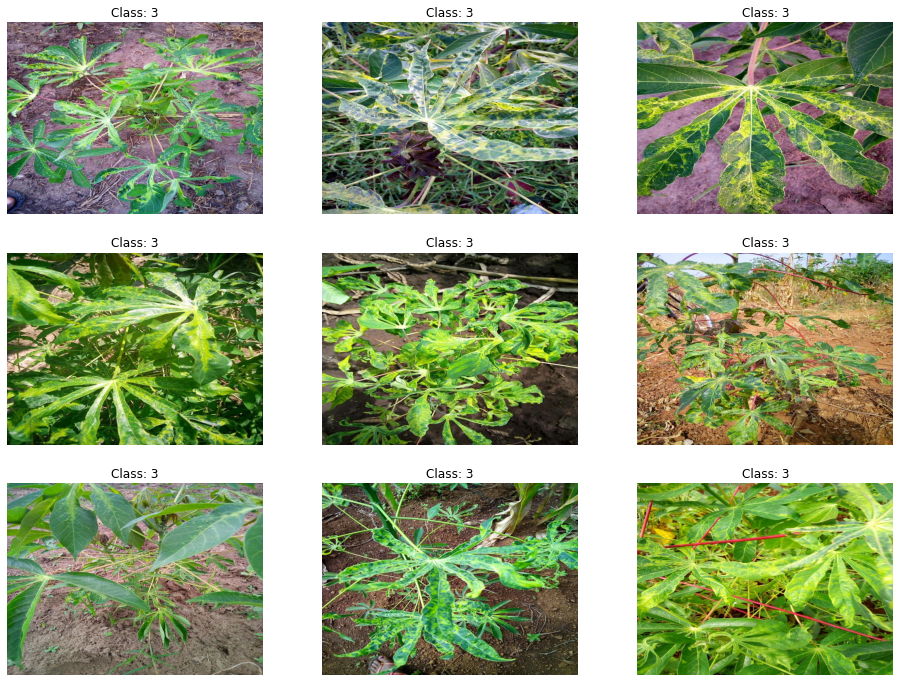

In [12]:
tmp_df = df_train[df_train["label"] == 3]
print(f"Total train images for class 3: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

In [ ]:
tmp_df = df_train[df_train["label"] == 4]
print(f"Total train images for class 4: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)